In [112]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import itertools

In [145]:
stock_a = pd.read_csv('../individual_stocks_5yr/AAPL_data.csv')
stock_b = pd.read_csv('../individual_stocks_5yr/APC_data.csv')

In [114]:
stock_a.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A


In [115]:
stock_b.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,23.140,23.210,23.0502,23.190,495972,LNT
1,2013-02-11,23.205,23.300,23.1250,23.255,530144,LNT
2,2013-02-12,23.220,23.415,23.2200,23.320,643436,LNT
3,2013-02-13,23.340,23.420,23.2250,23.305,874582,LNT
4,2013-02-14,23.265,23.560,23.1300,23.500,1191670,LNT


In [116]:
stock_a.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,49.187863,49.600059,48.782026,49.202025,2.338039e+06
std,9.244798,9.264168,9.197698,9.229804,1.400161e+06
min,33.180000,34.060000,33.115000,33.370000,5.328630e+05
25%,41.515000,41.870000,41.260000,41.560000,1.533018e+06
50%,46.640000,47.000000,46.341000,46.700000,2.003109e+06
75%,56.435000,56.935000,56.025000,56.495000,2.718401e+06
max,74.480000,75.000000,74.300000,74.820000,1.814641e+07


In [117]:
stock_b.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,32.785743,33.021742,32.542765,32.786640,1.230026e+06
std,5.934214,5.963851,5.899969,5.950278,1.527472e+06
min,23.140000,23.210000,23.050200,17.870000,2.932130e+05
25%,28.117500,28.387500,27.862500,28.155000,8.510420e+05
50%,31.110000,31.345000,30.853800,31.140000,1.093769e+06
75%,38.245000,38.550000,37.835000,38.235000,1.405287e+06
max,45.300000,45.550000,44.870000,45.180000,5.188082e+07


In [118]:
stock_b.open.dtype

dtype('float64')

In [119]:
b_dates = stock_b.date.unique()
a_dates = stock_a.date.unique()

In [120]:
res = [ele for ele in b_dates if ele not in a_dates]
res

[]

In [121]:
indices = [i for i in range(len(stock_a.index)) if i %30 == 0 or i == stock_a.index[-1]]
len(indices)

43

In [122]:
change = []
dates = []
for i in range(len(indices)-1):
    opening = indices[i]
    closing = indices[i+1]
    change.append(stock_a.open.iloc[closing] - stock_a.close.iloc[opening])
for i in range(len(indices)):
    dates.append(stock_a.date.iloc[indices[i]])

In [123]:
def percent_change(stock_df):
    indices = [i for i in range(len(stock_df.index)) if i %30 == 0 or i == stock_df.index[-1]]
    change = []
    for i in range(len(indices)-1):
        opening = indices[i]
        closing = indices[i+1]
        change.append((stock_df.close.iloc[closing] - stock_df.open.iloc[opening] / stock_df.open.iloc[opening]))
    return change

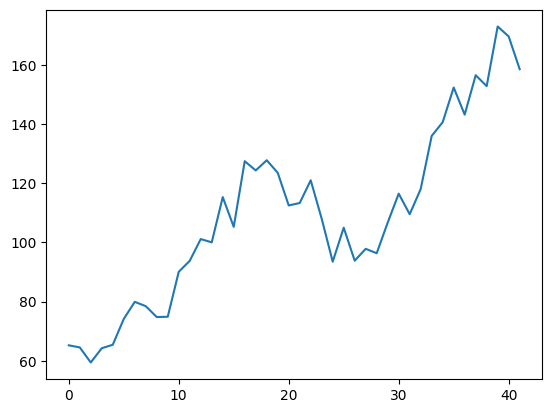

In [146]:
plt.plot(percent_change(stock_a))

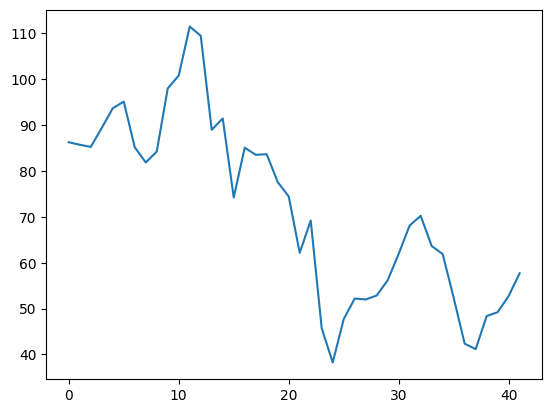

In [147]:
plt.plot(percent_change(stock_b))

In [126]:
stocks = pd.concat([stock_a, stock_b], ignore_index=True)
stocks['daily_change'] = stocks['close'] - stocks['open']
stocks.head()

,date,open,high,low,close,volume,Name,daily_change
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A,0.01
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A,-0.57
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A,-0.19
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A,-0.06
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A,-0.14


In [127]:
stock_a['daily_change'] = 100*(stock_a['close'] - stock_a['open'])/stock_a['open']
stock_b['daily_change'] = 100*(stock_b['close'] - stock_b['open'])/stock_b['open']

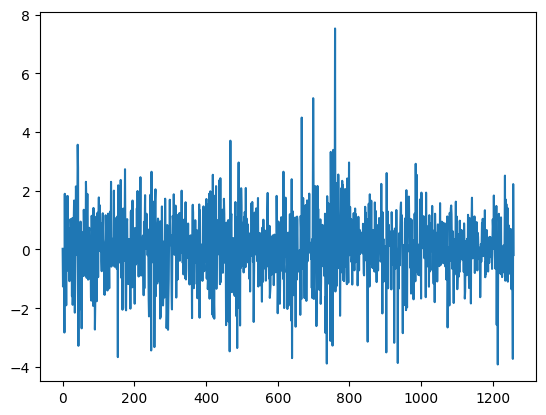

In [128]:
plt.plot(stock_a['daily_change'])

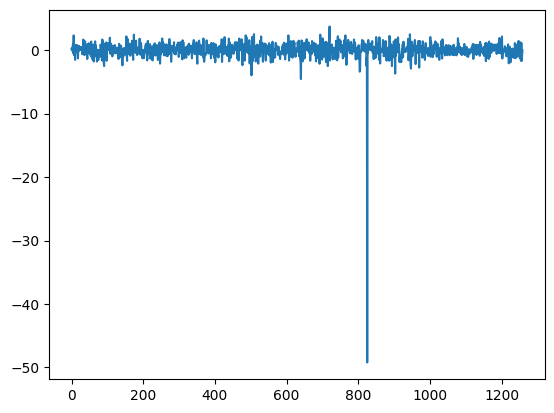

In [129]:
plt.plot(stock_b['daily_change'])

In [130]:
corr = stock_a['close'].corr(stock_b['close'])

In [131]:
corr

0.388590837418404

# Correlation here

In [132]:
def correlation(stock_a, stock_b):
    corr = stock_a['close'].corr(stock_b['close'])
    return corr

def csv_loader(filepath):
    filenames = os.listdir(filepath)
    csv_names = [filename for filename in filenames if filename.endswith('.csv')]
    csv_files = []
    for name in csv_names:
        csv_files.append(pd.read_csv(filepath+name))
    return csv_files

In [133]:

project_directory = os.path.dirname(os.path.abspath("main.py")) 
stocks_directory = os.path.dirname(os.path.abspath(project_directory)) 
stocks_directory

'/Users/thomascanro/Desktop/CLASSES/Data Structures & Algorithms/DeFAANG'

In [134]:
files = csv_loader(stocks_directory+'/individual_stocks_5yr/')

In [135]:
adj_list = {}
for i, stock1 in enumerate(files):
    adjacent_corrs = {}
    for j, stock2 in enumerate(files):
        adjacent_corrs[stock2.Name.iloc[0]] = correlation(stock1, stock2)
    adj_list[stock1.Name.iloc[0]] = adjacent_corrs
    

In [140]:
#Adjacency list for one stock
adj_list['AAPL']

{'XRX': -0.35546439563577203,
 'GS': 0.8613814927756926,
 'SPGI': 0.9344320185117776,
 'MTB': 0.8394250864731062,
 'V': 0.9144263853851327,
 'CTAS': 0.9144982951178441,
 'ESRX': 0.15733348245057144,
 'APH': 0.9390586236475462,
 'BBT': 0.8313992614680272,
 'RHI': 0.6514481208916577,
 'GGP': 0.24033921050097878,
 'HCA': 0.8435591043434265,
 'HD': 0.8938713325211984,
 'PEP': 0.8929216525905734,
 'INTC': 0.875579379893986,
 'MAC': 0.05855246471804246,
 'CLX': 0.802781665676234,
 'UNP': 0.7832805914769311,
 'WAT': 0.8866310110330096,
 'EMN': 0.42032254424356114,
 'ADSK': 0.8962694868166854,
 'ALK': 0.7737381985134414,
 'VZ': -0.08167578172541573,
 'AFL': 0.7802000242211794,
 'ADP': 0.9043855232835654,
 'CSRA': 0.5912855982560952,
 'AON': 0.9196159124828752,
 'APC': -0.5618246409033134,
 'WRK': 0.48902346680855646,
 'XYL': 0.8318312939024346,
 'OMC': 0.5254475262757423,
 'SLB': -0.40383126339134984,
 'NOV': -0.6745757292923907,
 'CMA': 0.8097309060161478,
 'INFO': 0.6398771830879062,
 'CRM':

In [137]:
#correlation of one stock to another
adj_list['AAPL']['AAPL']

1.0

# Standard Dev, latest value by name

In [138]:
features = pd.DataFrame(columns = ['Name', 'LastClosingVal', 'StandDev'])
for stock in files:
    std_dev = stock.close.std()
    name = stock.Name.iloc[0]
    lastVal = stock.close.iloc[-1]
    dict = {'Name' : name, 'LastClosingVal':lastVal, 'StandDev':std_dev}
    ser = pd.Series(dict)
    new_row_df = pd.DataFrame(ser).transpose()
    features = pd.concat([features, new_row_df], ignore_index=True)

In [149]:
features['Name'].unique()

array(['XRX', 'GS', 'SPGI', 'MTB', 'V', 'CTAS', 'ESRX', 'APH', 'BBT',
       'RHI', 'GGP', 'HCA', 'HD', 'PEP', 'INTC', 'MAC', 'CLX', 'UNP',
       'WAT', 'EMN', 'ADSK', 'ALK', 'VZ', 'AFL', 'ADP', 'CSRA', 'AON',
       'APC', 'WRK', 'XYL', 'OMC', 'SLB', 'NOV', 'CMA', 'INFO', 'CRM',
       'AMGN', 'ED', 'AIZ', 'RSG', 'NRG', 'FLIR', 'JPM', 'HIG', 'REGN',
       'UAL', 'AZO', 'STI', 'MHK', 'DFS', 'MU', 'LRCX', 'HRB', 'FOXA',
       'ISRG', 'TEL', 'BWA', 'CAG', 'SIG', 'CHD', 'FITB', 'JNPR', 'NFLX',
       'IFF', 'EOG', 'NEE', 'SBUX', 'RF', 'CNP', 'COTY', 'MCK', 'HP',
       'MOS', 'UA', 'DHI', 'KSU', 'FLR', 'FLS', 'C', 'TPR', 'NTAP',
       'DLTR', 'SNA', 'AVGO', 'ROP', 'HOG', 'RL', 'MA', 'MET', 'LNC',
       'TAP', 'WEC', 'NAVI', 'GPS', 'EIX', 'BHF', 'GM', 'NOC', 'AVB',
       'SRCL', 'EQR', 'ANSS', 'COST', 'CTL', 'AMG', 'PCLN', 'TRIP', 'PSA',
       'UTX', 'PGR', 'IVZ', 'GOOG', 'LUK', 'PKG', 'BXP', 'SRE', 'ACN',
       'QRVO', 'RJF', 'XRAY', 'DWDP', 'CI', 'KSS', 'BHGE', 'ADI', 'JNJ',
    